In [1]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.grid_fields import Mesh as hermesmesh

# %matplotlib qt
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

# Generate grid

  nx = 257, ny = 257
318

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  1e-05           (default)  
leg_refine_maxits                                 |  1000            (default)  
leg_trace_atol                                    |  2e-10           (defau

c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:269: RuntimeWarning: invalid value encountered in divide
  thisR1_b[:, 0] + thisdR1 / thisdZ1 * (Z2 - dZ2 / dR2 * R2 - thisZ1_b[:, 0])
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:270: RuntimeWarning: invalid value encountered in divide
  ) / (1.0 - thisdR1 / thisdZ1 * dZ2 / dR2)
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:331: RuntimeWarning: invalid value encountered in divide
  - (thisR1_b[:, 1] - thisR1_b[:, 0]) / (thisZ1_b[:, 1] - thisZ1_b[:, 0])


Generating a connected double null

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
cap_Bp_ylow_xpoint                                |  False           (default)  
curvature_smoothing                               |  None            (default)  
curvature_type                                    |  curl(b/B)       (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
follow_perpendicular_atol                         |  1e-08       

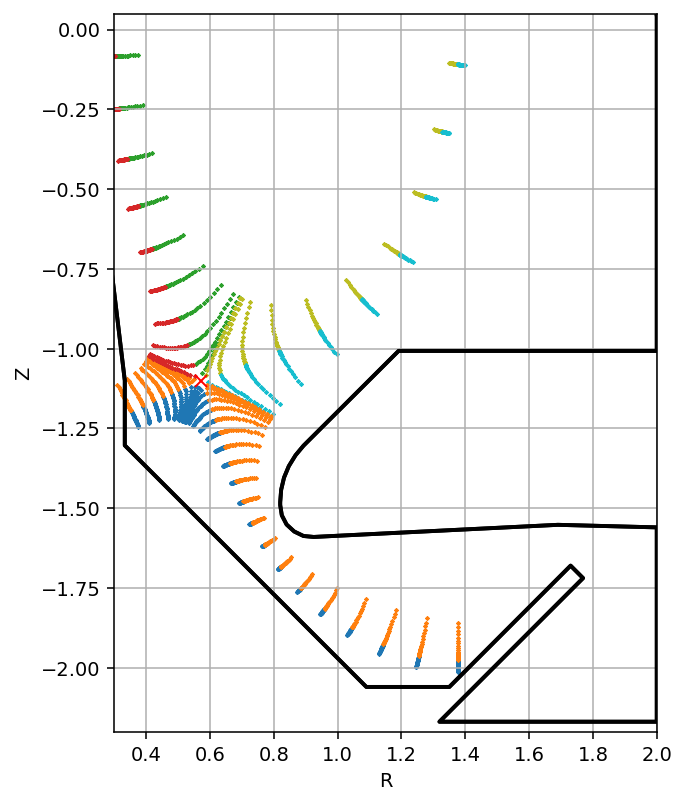

In [2]:
## Read input file and set grid path
gridname = "mastu-superx-g1_MHexample"
path = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\for_MH"

path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")

with open(path_yaml) as f:
    options = yaml.safe_load(f)

## Read equilibrium
with open(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\for_MH\qian_exp45460_new_MHexample.eqdsk", "rt") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

## Create mesh object
mesh = BoutMesh(eq, options)
# mesh.redistributePoints(options)

mesh.calculateRZ()

## Pkot
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
eq.plotWall(axis = ax)

ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.3, 2]); ax.set_ylim([-2.2,0.05])     # Both lower divertors
# ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
# ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
# ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP

ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)

## Save figure
# fig.save(os.path.join(
#     r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\D moulton super X",
#     gridname + ".png"))


# Read grid file into sdtools plotter

In [10]:
m = hermesmesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\mu1a-from_lowres_modified.nc")

## Plot just the grid in RZ space

(-2.0, -0.4)

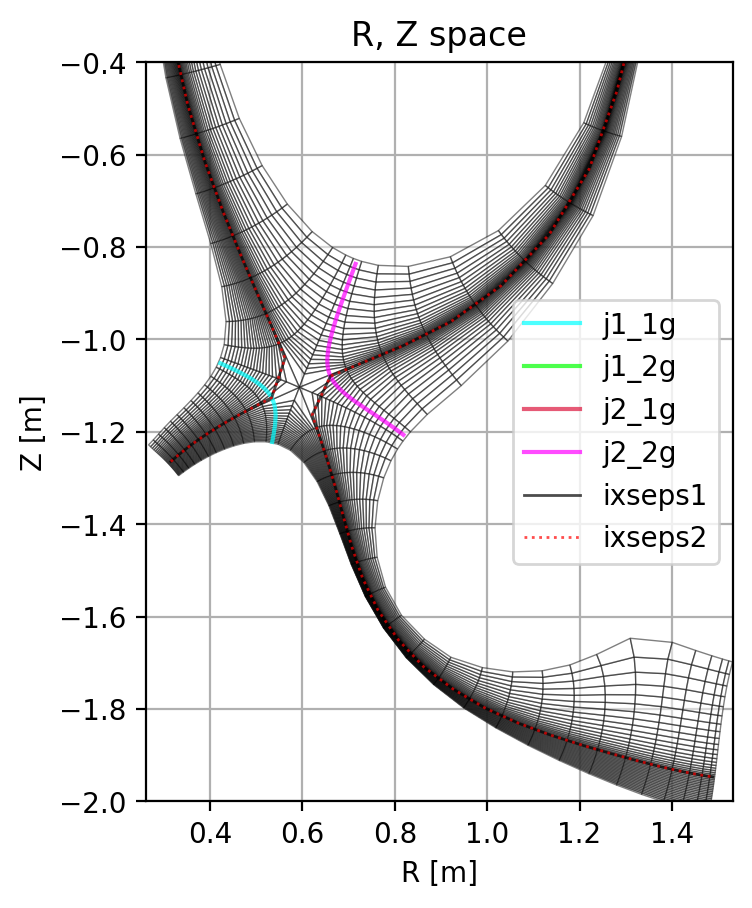

In [15]:
fig, ax =plt.subplots(dpi = 200)
m.plot_rz_grid(ax = ax)
ax.set_ylim(-2, -0.4)


## Plot grid in XY space
- Sorry - still just scatter.

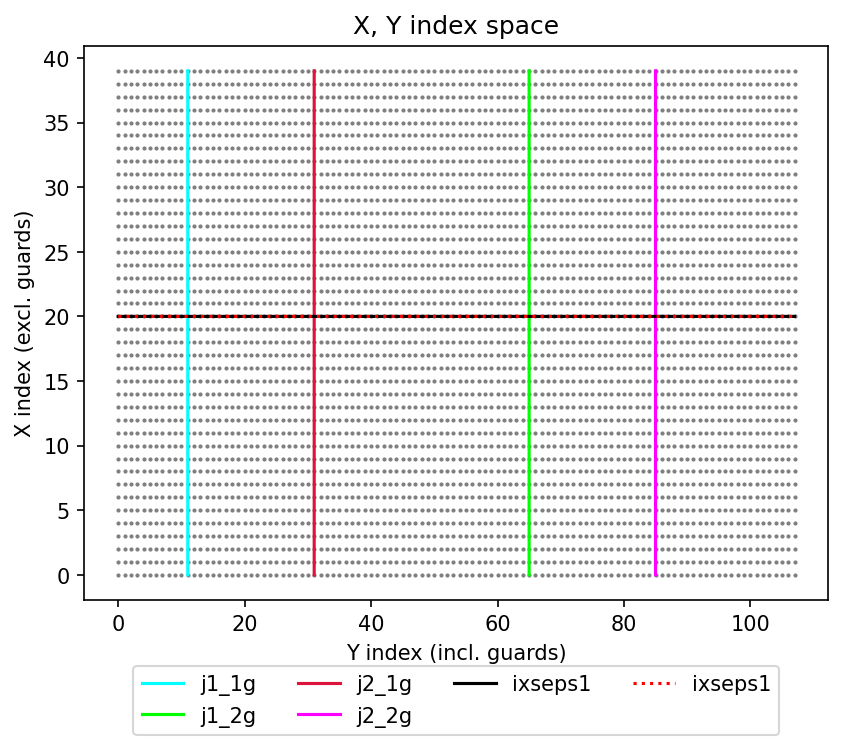

In [20]:
fig, ax =plt.subplots(dpi = 150)
m.plot_xy_grid(ax = ax)



# equilibrium plot + grid plot

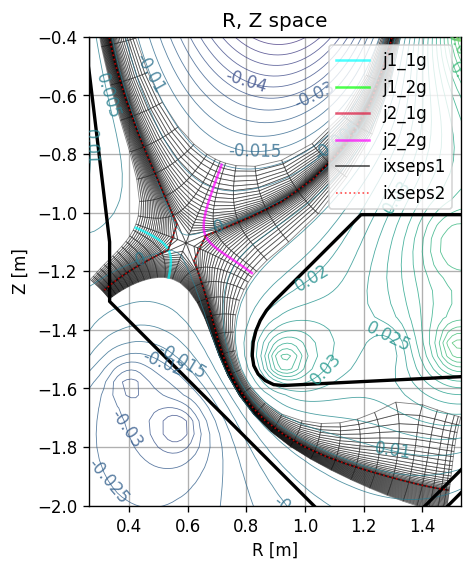

In [ ]:
fig, ax = plt.subplots(figsize = (4,8), dpi = 120)

# Plot equilibrium (from Hypnotoad)
eq.plotPotential(ncontours=50, axis = ax, linewidths = 0.5, alpha = 0.8)
eq.plotWall(axis = ax)

# Plot grid (from  my tools)
m.plot_rz_grid(ax = ax)
ax.set_ylim(-2, -0.4)

ax.set_aspect("equal")

# Write grid to file

Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances inner_core(0)tances: 41
Distances inner_core(1)tances: 41
Distances inner_upper_divertor(0)
Distances inner_upper_divertor(1)
Distances outer_upper_divertor(0)


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:1473: RuntimeWarning: divide by zero encountered in scalar divide
  norm = 1.0 / (dpsidr**2 + dpsidz**2)  # Common factor
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:1474: RuntimeWarning: invalid value encountered in scalar multiply
  return [dpsidr * norm, dpsidz * norm]



PsiContour distance [0.0, 0.07031335918171885, 0.13867080043051905, 0.20460576796517066, 0.26802274914519925, 0.3290142145118084, 0.38773906942114, 0.4443645804867337, 0.49900961689550777, 0.5517141081100351, 0.6031108173963493, 0.652072769815135, 0.6996089190428613, 0.7454358965825998, 0.7895441884066183, 0.8320461890690912, 0.8729582205618297, 0.9122789656219046, 0.9499945381631157, 0.9860290208654274, 1.0203349400053316, 1.0529187225045067, 1.0837034953773028, 1.1127045830101903, 1.139900014248135, 1.1652275267994812, 1.188592687653363, 1.2098709751577852, 1.2288675637574105, 1.2453824230244475, 1.2592965677856396, 1.2706062362099555, 1.279463665354829, 1.2861565385628349, 1.2910553787434174, 1.2987618031799313, 1.2963788507260834, 1.2963045787027376, 1.2962951791218784, 1.2962918498826745, 1.5816470847415052]

FineContour distance [0.         0.01597623 0.03195247 0.0479287  0.06390493 0.07988116
 0.0958574  0.11183363 0.12780986 0.1437861  0.15976233 0.17573856
 0.1917148  0.2076

C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:738: UserWarning: FineContour: maximum iterations (200) exceeded with ds_error 0.25763495765208794
  warnings.warn(


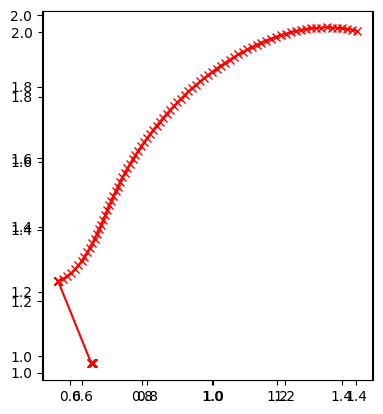

ValueError: Distance not monotonically increasing for this contour. distance=[0.0, 0.07031335918171885, 0.13867080043051905, 0.20460576796517066, 0.26802274914519925, 0.3290142145118084, 0.38773906942114, 0.4443645804867337, 0.49900961689550777, 0.5517141081100351, 0.6031108173963493, 0.652072769815135, 0.6996089190428613, 0.7454358965825998, 0.7895441884066183, 0.8320461890690912, 0.8729582205618297, 0.9122789656219046, 0.9499945381631157, 0.9860290208654274, 1.0203349400053316, 1.0529187225045067, 1.0837034953773028, 1.1127045830101903, 1.139900014248135, 1.1652275267994812, 1.188592687653363, 1.2098709751577852, 1.2288675637574105, 1.2453824230244475, 1.2592965677856396, 1.2706062362099555, 1.279463665354829, 1.2861565385628349, 1.2910553787434174, 1.2987618031799313, 1.2963788507260834, 1.2963045787027376, 1.2962951791218784, 1.2962918498826745, 1.5816470847415052]

In [3]:
mesh.geometry()
mesh.writeGridfile(path_grid)